<a href="https://colab.research.google.com/github/Eliandry/Neural-networks/blob/main/colorChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [87]:
upl=files.upload()
names=list(upl.keys())
images=[]
for i in range(len(names)):
  img = Image.open(BytesIO(upl[names[i]]))
  images.append(img)


Saving 1488399659_0_0_960_960_600x0_80_0_1_e38b72053fffa5d3d7e82d2fe116f0b3.jpg to 1488399659_0_0_960_960_600x0_80_0_1_e38b72053fffa5d3d7e82d2fe116f0b3 (2).jpg
Saving unnamed.jpg to unnamed (4).jpg


In [88]:
def processed_image(img):
  image=img.resize((256,256),Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]
  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [89]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)) #уменьшение в 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) #увелич в 2 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [96]:
model.compile(optimizer='adam',loss='mse')
for img in images:
  X,Y,size=processed_image(img)
  model.fit(x=X,y=Y,batch_size=len(images),epochs=45)

Epoch 1/45
1/1 [==============================] - 2s 2s/step - loss: 0.0020
Epoch 2/45
1/1 [==============================] - 1s 1s/step - loss: 0.0016
Epoch 3/45
1/1 [==============================] - 1s 1s/step - loss: 0.0017
Epoch 4/45
1/1 [==============================] - 1s 1s/step - loss: 0.0016
Epoch 5/45
1/1 [==============================] - 1s 1s/step - loss: 0.0016
Epoch 6/45
1/1 [==============================] - 1s 1s/step - loss: 0.0015
Epoch 7/45
1/1 [==============================] - 1s 1s/step - loss: 0.0015
Epoch 8/45
1/1 [==============================] - 1s 1s/step - loss: 0.0014
Epoch 9/45
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 10/45
1/1 [==============================] - 1s 1s/step - loss: 0.0013
Epoch 11/45
1/1 [==============================] - 1s 1s/step - loss: 0.0012
Epoch 12/45
1/1 [==============================] - 1s 1s/step - loss: 0.0011
Epoch 13/45
1/1 [==============================] - 1s 1s/step - loss: 0.0011
Epoch 14

In [97]:
upl=files.upload()
names=list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X,Y,size=processed_image(img)

Saving 1488399659_0_0_960_960_600x0_80_0_1_e38b72053fffa5d3d7e82d2fe116f0b3.jpg to 1488399659_0_0_960_960_600x0_80_0_1_e38b72053fffa5d3d7e82d2fe116f0b3 (5).jpg


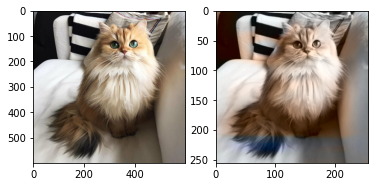

In [98]:
output=model.predict(X)
output*=128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))